In [ ]:

import scipy as sp
from scipy import constants, integrate, optimize, signal, stats,special
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [32]:
from scipy import constants
import scipy as sp

# 'scipy.constants' hakkında bilgi almak için doğru kullanım

# Sabitleri al
a = constants.pi  # pi sabiti
b = constants.Boltzmann  # Boltzmann sabiti

# Sabitlerin değerlerini yazdır
print(a, b)
print(a/b)

3.141592653589793 1.380649e-23
2.2754462963358485e+23


In [ ]:
import numpy as np
from scipy.linalg import inv, det

# 2x2'lik bir matris örneği
A = np.array([[1, 2], [3, 4]])

# Matrisin tersini alma
A_inv = inv(A)
print("A'nın Tersi:")
print(A_inv)

# Matrisin determinantını hesaplama
A_det = det(A)
print("A'nın Determinantı:", A_det)


A'nın Tersi:
[[-2.   1. ]
 [ 1.5 -0.5]]
A'nın Determinantı: -2.0


In [ ]:
from scipy.linalg import lu

# 3x3'lik bir matris örneği
B = np.array([[4, 3, 2], [2, 3, 1], [1, 1, 2]])

# LU çarpanlarına ayırma
P, L, U = lu(B)

print("P Matriksi (Permutation):")
print(P)
print("L Matriksi (Lower):")
print(L)
print("U Matriksi (Upper):")
print(U)


P Matriksi (Permutation):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L Matriksi (Lower):
[[1.         0.         0.        ]
 [0.5        1.         0.        ]
 [0.25       0.16666667 1.        ]]
U Matriksi (Upper):
[[4.  3.  2. ]
 [0.  1.5 0. ]
 [0.  0.  1.5]]


In [ ]:
from scipy.sparse import csr_matrix
import numpy as np

# 5x5'lik bir seyrek matris oluşturuyoruz
dense_matrix = np.array([[0, 0, 0, 0, 1],
                         [0, 0, 0, 0, 0],
                         [0, 0, 1, 0, 0],
                         [0, 0, 0, 0, 0],
                         [1, 0, 0, 0, 0]])

sparse_matrix = csr_matrix(dense_matrix)
sparse_matrix = sparse_matrix*2

print("Seyrek Matris:")
print(sparse_matrix)

# Seyrek matrisi kullanarak çarpma işlemi
result = sparse_matrix.dot(np.array([1, 0, 0, 0, 1]))
print("Çarpma Sonucu:", result)


Seyrek Matris:
  (0, 4)	2
  (2, 2)	2
  (4, 0)	2
Çarpma Sonucu: [2 0 0 0 2]


In [ ]:
#wiev alternative because  depraceted this  1.0.0 version from scipy
from numba import jit
import numpy as np

@jit
def double_vector(x):
    for i in range(len(x)):
        x[i] *= 2
    return x

x = np.arange(1000000)
x = double_vector(x)

print(x[:10])  # İlk 10 elemanı yazdır


[ 0  2  4  6  8 10 12 14 16 18]


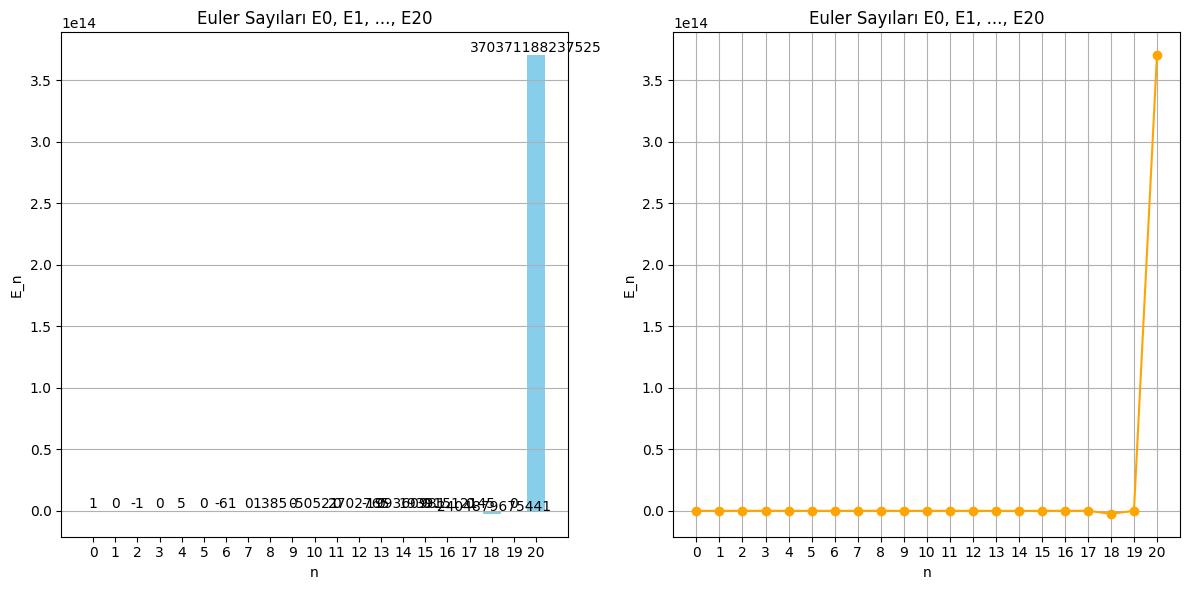

Euler Sayıları:
E_0 = 1.0
E_1 = 0.0
E_2 = -1.0
E_3 = 0.0
E_4 = 5.000000000000001
E_5 = 0.0
E_6 = -61.00000000000001
E_7 = 0.0
E_8 = 1385.0000000000002
E_9 = 0.0
E_10 = -50521.00000000006
E_11 = 0.0
E_12 = 2702765.000000003
E_13 = 0.0
E_14 = -199360981.00000018
E_15 = 0.0
E_16 = 19391512145.00002
E_17 = 0.0
E_18 = -2404879675441.002
E_19 = 0.0
E_20 = 370371188237525.4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import euler

# Euler sayılarının hesaplanacağı n değeri
n = 20  # 0'dan 20'ye kadar Euler sayıları

# Euler sayılarını hesapla
euler_numbers = euler(n)

# Euler sayılarının görselleştirilmesi
plt.figure(figsize=(12, 6))

# Çubuk grafik
plt.subplot(1, 2, 1)
plt.bar(range(n + 1), euler_numbers, color='skyblue')
plt.title('Euler Sayıları E0, E1, ..., E{}'.format(n))
plt.xlabel('n')
plt.ylabel('E_n')
plt.xticks(range(n + 1))
plt.grid(axis='y')

# Euler sayılarının değerlerini yazdır
for i, value in enumerate(euler_numbers):
    plt.text(i, value + 0.5, str(int(value)), ha='center', va='bottom')

# Euler sayılarının çizgi grafiği
plt.subplot(1, 2, 2)
plt.plot(range(n + 1), euler_numbers, marker='o', color='orange', linestyle='-')
plt.title('Euler Sayıları E0, E1, ..., E{}'.format(n))
plt.xlabel('n')
plt.ylabel('E_n')
plt.xticks(range(n + 1))
plt.grid()

# Grafiği göster
plt.tight_layout()
plt.show()

# Euler sayıları hakkında bilgi
print("Euler Sayıları:")
for i, value in enumerate(euler_numbers):
    print(f"E_{i} = {value}")

In [ ]:
def integrand(t,n,x):
  return np.exp(-x*t) / t**n

def expint(n,x):
  return integrate.quad(integrand, 1, np.inf, args=(n, x))[0]
vec_expint = np.vectorize(expint)
vec_expint(3,np.arange(1.0,4.0,0.5))


array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

In [ ]:
from scipy.integrate import dblquad
import numpy as np

# Fonksiyon tanımı
def I(n):
    return dblquad(
        lambda t, x: np.exp(-x * t) / t**n,  # Entegral fonksiyonu
        0, np.inf,                           # x sınırları
        lambda x: 1, lambda x: np.inf        # t sınırları
    )

# Test
result, error = I(2)
print(f"Sonuç: {result}, Hata: {error}")


Sonuç: 0.4999999999985751, Hata: 1.3894083651858995e-08


In [ ]:
from scipy.integrate import odeint
from scipy.special import gamma, airy
import numpy as np

# Başlangıç koşulları
y1_0 = 1.0 / (3**(2.0 / 3.0) * gamma(2.0 / 3.0))
y0_0 = -1.0 / (3**(1.0 / 3.0) * gamma(1.0 / 3.0))
y0 = [y0_0, y1_0]

# Fonksiyon tanımları
def func(y, t):
    return [t * y[1], y[0]]

def gradient(y, t):
    return [[0, t], [1, 0]]  # Jacobian matrisi

# x ve t aralıkları
x = np.arange(0, 4.0, 0.01)
t = x

# Karşılaştırma için Airy fonksiyonları
ychk = airy(x)[0]

# ODE çözümü
y = odeint(func, y0, t)
y2 = odeint(func, y0, t, Dfun=gradient)

# Sonuçları yazdır
print("ODE Çözümü:")
print(y)
print("\nAiry Karşılaştırması:")
print(ychk)


ODE Çözümü:
[[-0.2588194   0.35502805]
 [-0.25880175  0.35243993]
 [-0.2587491   0.34985215]
 [-0.25866196  0.34726504]
 [-0.25854089  0.344679  ]
 [-0.25838639  0.34209433]
 [-0.25819897  0.33951138]
 [-0.25797914  0.33693046]
 [-0.25772744  0.3343519 ]
 [-0.25744435  0.33177601]
 [-0.25713041  0.32920312]
 [-0.25678612  0.32663351]
 [-0.25641198  0.32406749]
 [-0.25600852  0.32150537]
 [-0.25557624  0.31894742]
 [-0.25511564  0.31639394]
 [-0.25462722  0.3138452 ]
 [-0.2541115   0.31130149]
 [-0.25356896  0.30876306]
 [-0.25300012  0.3062302 ]
 [-0.25240545  0.30370315]
 [-0.25178547  0.30118217]
 [-0.25114065  0.29866752]
 [-0.25047149  0.29615944]
 [-0.24977848  0.29365817]
 [-0.24906209  0.29116395]
 [-0.24832282  0.288677  ]
 [-0.24756113  0.28619757]
 [-0.24677751  0.28372586]
 [-0.24597242  0.28126209]
 [-0.24514634  0.27880648]
 [-0.24429974  0.27635923]
 [-0.24343307  0.27392055]
 [-0.2425468   0.27149064]
 [-0.24164139  0.26906968]
 [-0.24071728  0.26665787]
 [-0.23977494  0

In [ ]:
from scipy.optimize import fmin
import numpy as np

# Rosenbrock fonksiyonunun tanımı
def rosen(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# Başlangıç noktası
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]

# Rosenbrock fonksiyonunu minimize et
xopt = fmin(rosen, x0, xtol=1e-8)

# Sonucu yazdır
print("Optimal çözüm:", xopt)



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
Optimal çözüm: [1. 1. 1. 1. 1.]


Pi: 3.141592653589793
Speed of light: 299792458.0
Gravitational constant: 6.6743e-11

Integration of x^2 from 0 to 1: 0.33333333333333337

Minimization of x^2 + 2x + 1:  message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 0.0
       x: -1.0000000000000002
     nit: 4
    nfev: 8


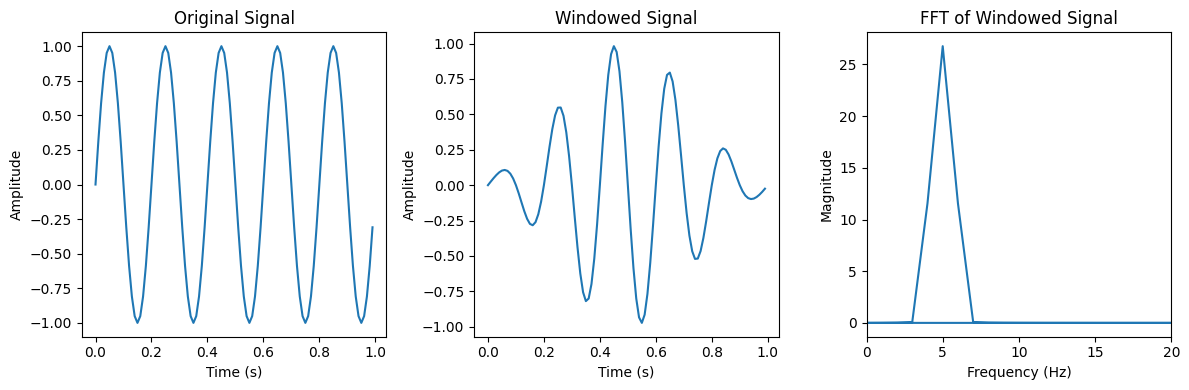


Mean of the random data: -0.035262704534612076
Standard deviation of the random data: 0.9394883771806246

One-sample t-test t-statistic: -1.1863339272404727
One-sample t-test p-value: 0.23577251255670895


In [ ]:


import scipy as sp
from scipy import constants, integrate, optimize, signal, stats
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Constants
print("Pi:", constants.pi)
print("Speed of light:", constants.c)
print("Gravitational constant:", constants.G)

# Integration
def f(x):
  return x**2

result, error = integrate.quad(f, 0, 1)
print("\nIntegration of x^2 from 0 to 1:", result)

# Optimization
def g(x):
  return x**2 + 2*x + 1

min_result = optimize.minimize_scalar(g)
print("\nMinimization of x^2 + 2x + 1:", min_result)

# Signal Processing
# Generate a sine wave
fs = 100  # Sampling frequency
t = np.arange(0, 1, 1/fs)
f = 5  # Frequency of the sine wave
x = np.sin(2 * np.pi * f * t)

# Apply a window function
window = signal.windows.hamming(len(x))
x_windowed = x * window

# Compute the FFT
X = np.fft.fft(x_windowed)
freqs = np.fft.fftfreq(len(x), 1/fs)

# Plot the original and windowed signals, and the FFT
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(t, x)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.plot(t, x_windowed)
plt.title('Windowed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 3)
plt.plot(freqs, np.abs(X))
plt.title('FFT of Windowed Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, 20) # Limit x-axis for better visualization

plt.tight_layout()
plt.show()

# Statistics
data = np.random.normal(loc=0, scale=1, size=1000)  # Generate random data
mean = np.mean(data)
std = np.std(data)

print("\nMean of the random data:", mean)
print("Standard deviation of the random data:", std)

# Statistical Tests
t_statistic, p_value = stats.ttest_1samp(data, 0) # One-sample t-test
print("\nOne-sample t-test t-statistic:", t_statistic)
print("One-sample t-test p-value:", p_value)



In [ ]:
from scipy.optimize import minimize
import numpy as np

# Rosenbrock fonksiyonunun tanımı
def rosen(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# Gradient (Jacobian) tanımı
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    grad = np.zeros_like(x)
    grad[1:-1] = 200 * (xm - xm_m1**2) - 400 * (xm_p1 - xm**2) * xm - 2 * (1 - xm)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[-1] = 200 * (x[-1] - x[-2]**2)
    return grad

# Tam Hessian matrisini hesaplama
def rosen_hess(x):
    n = len(x)
    hess = np.zeros((n, n))
    for i in range(n):
        if i > 0:
            hess[i, i-1] = -400 * x[i-1]
        if i < n - 1:
            hess[i, i+1] = -400 * x[i]
        hess[i, i] = 1200 * x[i]**2 - 400 * (x[i+1] if i < n-1 else 0) + 2
    return hess

# Başlangıç tahmini
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]

# Minimize et
result = minimize(
    rosen,
    x0,
    method='trust-ncg',  # Trust-region tabanlı Newton yöntemi
    jac=rosen_der,
    hess=rosen_hess,
    options={'disp': True}
)

# Sonuçları yazdır
print("Optimal Çözüm:", result.x)
print("Minimum Değer:", result.fun)


         Current function value: 0.026293
         Iterations: 1000
         Function evaluations: 1001
         Gradient evaluations: 1000
         Hessian evaluations: 999
Optimal Çözüm: [1.01660661 1.03356156 1.06842206 1.1419071  1.30468274]
Minimum Değer: 0.026292835590518246


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:732: RuntimeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_trust_ncg(fun, x0, args, jac, hess, hessp,


In [ ]:
from scipy.optimize import minimize
import numpy as np

# Rosenbrock fonksiyonunun tanımı
def rosen(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# Gradient (Jacobian) tanımı
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    grad = np.zeros_like(x)
    grad[1:-1] = 200 * (xm - xm_m1**2) - 400 * (xm_p1 - xm**2) * xm - 2 * (1 - xm)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[-1] = 200 * (x[-1] - x[-2]**2)
    return grad

# Başlangıç tahmini
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]

# Minimize et
result = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True})

# Sonuçları yazdır
print("Optimal Çözüm:", result.x)
print("Minimum Değer:", result.fun)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
Optimal Çözüm: [1.00000004 1.0000001  1.00000021 1.00000044 1.00000092]
Minimum Değer: 4.0130879821599437e-13


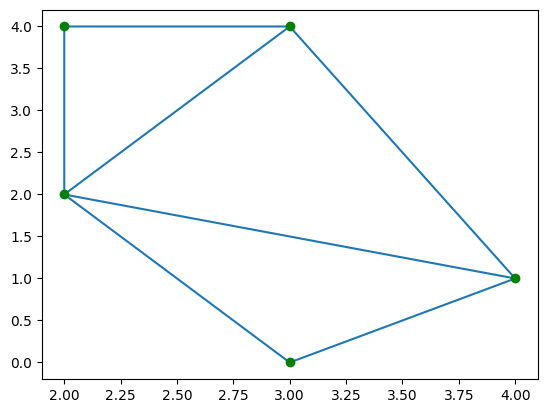

In [ ]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

points = np.array([
  [2, 4],
  [3, 4],
  [3, 0],
  [2, 2],
  [4, 1]
])

simplices = Delaunay(points).simplices

plt.triplot(points[:, 0], points[:, 1], simplices)
plt.scatter(points[:, 0], points[:, 1], color='g')
n
plt.show()

In [ ]:
from scipy.optimize import minimize
import numpy as np

# Rosenbrock fonksiyonunun tanımı
def rosen(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

# Gradient (Jacobian) tanımı
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    grad = np.zeros_like(x)
    grad[1:-1] = 200 * (xm - xm_m1**2) - 400 * (xm_p1 - xm**2) * xm - 2 * (1 - xm)
    grad[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    grad[-1] = 200 * (x[-1] - x[-2]**2)
    return grad

# Hessian-vektör çarpımı
def rosen_hess_prod(x, p):
    """
    Hesaplama: (Hessian * vektör) çarpımı
    """
    Hp = np.zeros_like(x)
    n = len(x)
    for i in range(n):
        if i > 0:
            Hp[i] += -400 * p[i - 1] * x[i - 1]
        if i < n - 1:
            Hp[i] += -400 * p[i] * x[i]
        Hp[i] += (1200 * x[i]**2 - 400 * x[i+1] + 2 if i < n - 1 else 200) * p[i]
    return Hp

# Başlangıç tahmini
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]

# Minimize et
result = minimize(
    rosen,
    x0,
    method='Newton-CG',
    jac=rosen_der,
    hessp=rosen_hess_prod,
    options={'disp': True}
)

# Sonuçları yazdır
print("Optimal Çözüm:", result.x)
print("Minimum Değer:", result.fun)


         Current function value: 42.510684
         Iterations: 1
         Function evaluations: 2
         Gradient evaluations: 2
         Hessian evaluations: 101
Optimal Çözüm: [1.12469938 0.79707178 0.91618683 1.19070254 1.36394043]
Minimum Değer: 42.51068360598663


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_optimize.py:2104: OptimizeWarning: Warning: CG iterations didn't converge. The Hessian is not positive definite.
  return terminate(3, msg)


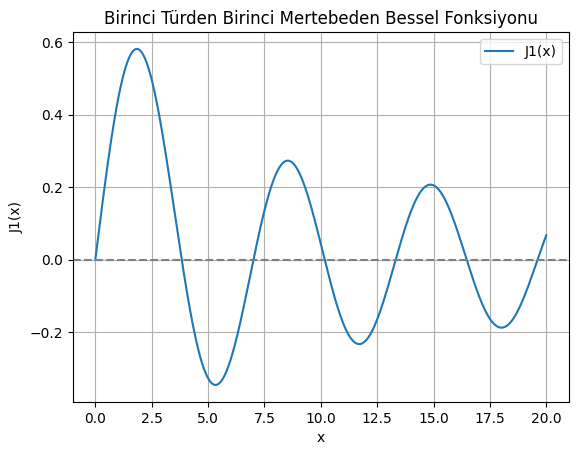

In [ ]:
import numpy as np
from scipy.special import j1
import matplotlib.pyplot as plt

# x değerlerini tanımla
x = np.linspace(0, 20, 500)

# J1(x) hesapla
y = j1(x)

# Grafiği çiz
plt.plot(x, y, label="J1(x)")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Birinci Türden Birinci Mertebeden Bessel Fonksiyonu")
plt.xlabel("x")
plt.ylabel("J1(x)")
plt.legend()
plt.grid()
plt.show()


Bessel J1(x) kökleri:
[ 0.          3.83170597  3.83170597  7.01558667 10.17346814 10.17346814
 13.32369194 16.47063005 13.32369194 19.61585851]


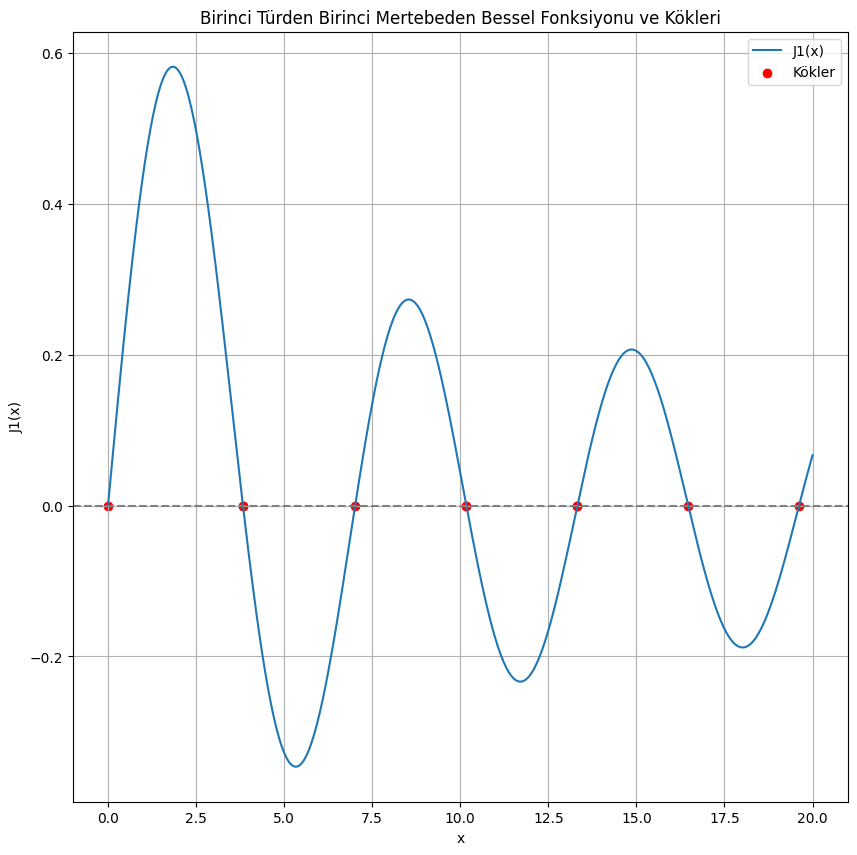

In [ ]:
import numpy as np
from scipy.special import j1
from scipy.optimize import root

# Bessel fonksiyonunun köklerini bulmak için bir fonksiyon tanımla
def find_bessel_roots(func, x_guesses):
    roots = []
    for x_guess in x_guesses:
        sol = root(func, x_guess)
        if sol.success:
            roots.append(sol.x[0])  # Kökü ekle
    return np.array(roots)

# Birinci türden birinci mertebeden Bessel fonksiyonu J1(x)
def bessel_j1(x):
    return j1(x)

# Başlangıç tahminlerini tanımla (yaklaşık kökler)
x_guesses = np.linspace(0.1, 20, 10)  # 0.1'den 20'ye kadar yaklaşık tahminler

# Kökleri bul
roots = find_bessel_roots(bessel_j1, x_guesses)

# Sonuçları yazdır
print("Bessel J1(x) kökleri:")
print(roots)

# Köklerin bir grafiğini çiz
import matplotlib.pyplot as plt

x = np.linspace(0, 20, 500)
y = j1(x)
plt.figure(figsize=(10, 10))
plt.plot(x, y, label="J1(x)")
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(roots, [0]*len(roots), color='red', label="Kökler")
plt.title("Birinci Türden Birinci Mertebeden Bessel Fonksiyonu ve Kökleri")
plt.xlabel("x")
plt.ylabel("J1(x)")
plt.legend()
plt.grid()
plt.show()


0:  |F(x)| = 40.1231; step 1
1:  |F(x)| = 16.8214; step 1
2:  |F(x)| = 5.69333; step 1
3:  |F(x)| = 1.4089; step 1
4:  |F(x)| = 0.0386531; step 1
5:  |F(x)| = 0.00172107; step 1
6:  |F(x)| = 0.000132772; step 1
7:  |F(x)| = 6.25577e-06; step 1
8:  |F(x)| = 3.63949e-07; step 1
Residual 3.6394858327071233e-07


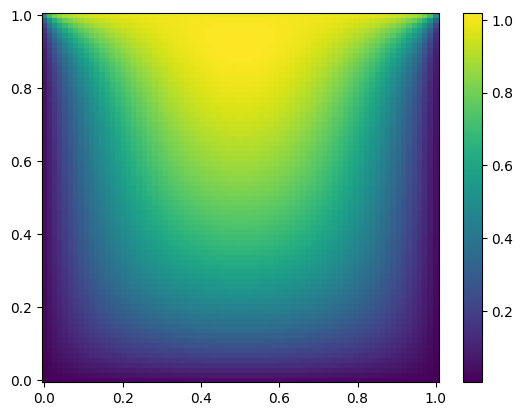

In [ ]:
import numpy as np
from scipy.optimize import newton_krylov
from numpy import cosh, zeros_like, mgrid, zeros
# parameters
nx, ny = 75, 75
hx, hy = 1./(nx-1), 1./(ny-1)
P_left, P_right = 0, 0
P_top, P_bottom = 1, 0
def residual(P):
  d2x = zeros_like(P)
  d2y = zeros_like(P)
  d2x[1:-1] = (P[2:] - 2*P[1:-1] + P[:-2]) / hx/hx
  d2x[0] = (P[1] - 2*P[0] + P_left)/hx/hx
  d2x[-1] = (P_right - 2*P[-1] + P[-2])/hx/hx
  d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
  d2y[:,0] = (P[:,1] - 2*P[:,0] + P_bottom)/hy/hy
  d2y[:,-1] = (P_top - 2*P[:,-1] + P[:,-2])/hy/hy
  return d2x + d2y + 5*cosh(P).mean()**2
# solve
guess = zeros((nx, ny), float)
sol = newton_krylov(residual, guess, verbose=1)
#sol = broyden2(residual, guess, max_rank=50, verbose=1)
#sol = anderson(residual, guess, M=10, verbose=1)
print ("Residual", abs(residual(sol)).max())
# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(nx*1j), 0:1:(ny*1j)]
plt.pcolor(x, y, sol)
plt.colorbar()
plt.show()

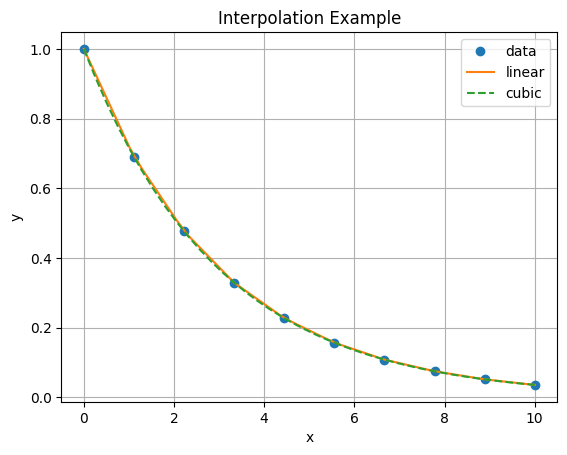

In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Veri noktalarını oluştur
x = np.linspace(0, 10, 10)  # x değerleri
y = np.exp(-x / 3.0)        # y değerleri

# Lineer ve kübik interpolasyon fonksiyonları
f = interp1d(x, y)                # Lineer interpolasyon
f2 = interp1d(x, y, kind='cubic') # Kübik interpolasyon

# Yeni x değerleri oluştur
xnew = np.linspace(0, 10, 40)

# Grafiği çiz
plt.plot(x, y, 'o', label='data')            # Veri noktaları
plt.plot(xnew, f(xnew), '-', label='linear') # Lineer interpolasyon
plt.plot(xnew, f2(xnew), '--', label='cubic')# Kübik interpolasyon

# Açıklama ve gösterim
plt.legend(loc='best')
plt.title("Interpolation Example")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


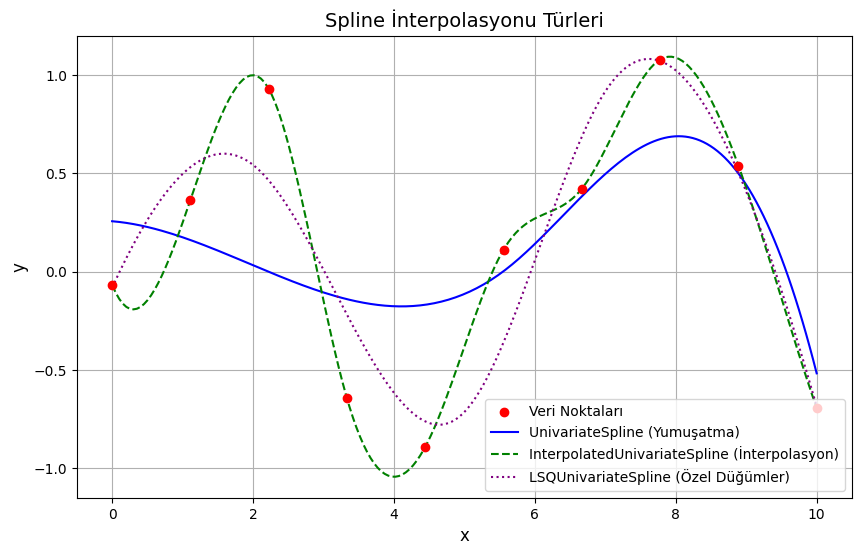

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline, LSQUnivariateSpline

# Veri oluşturma
x = np.linspace(0, 10, 10)
y = np.sin(x) + 0.3 * np.random.randn(10)  # Gürültülü sinüs verisi

# 1. UnivariateSpline: Yumuşatma Spline
spline_smooth = UnivariateSpline(x, y, s=2)  # Düzgünlük parametresi
x_new = np.linspace(0, 10, 200)
y_smooth = spline_smooth(x_new)

# 2. InterpolatedUnivariateSpline: Tüm noktalardan geçen spline
spline_interp = InterpolatedUnivariateSpline(x, y)
y_interp = spline_interp(x_new)

# 3. LSQUnivariateSpline: Özel düğümlerle spline
knots = [2, 5, 7]  # Düğümler
spline_lsq = LSQUnivariateSpline(x, y, t=knots)
y_lsq = spline_lsq(x_new)

# Grafik
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Veri Noktaları", color="red", zorder=5)
plt.plot(x_new, y_smooth, label="UnivariateSpline (Yumuşatma)", color="blue")
plt.plot(x_new, y_interp, label="InterpolatedUnivariateSpline (İnterpolasyon)", color="green", linestyle="--")
plt.plot(x_new, y_lsq, label="LSQUnivariateSpline (Özel Düğümler)", color="purple", linestyle=":")

# Grafik özellikleri
plt.title("Spline İnterpolasyonu Türleri", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


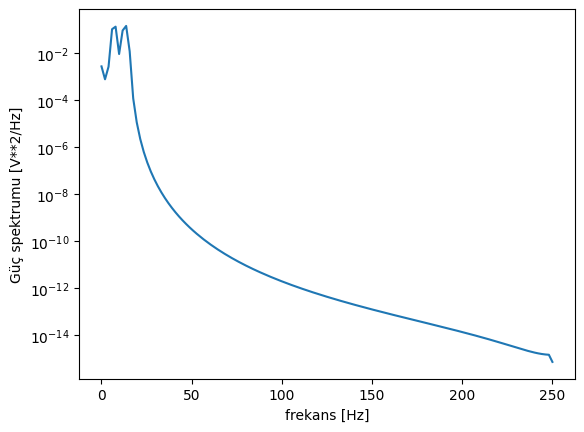

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Sinüs dalgası oluştur
t = np.linspace(0, 1, 500)
x = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 13 * t)

# Fourier dönüşümünü al
f, Pxx_den = signal.welch(x, fs=500)

plt.semilogy(f, Pxx_den)
plt.xlabel('frekans [Hz]')
plt.ylabel('Güç spektrumu [V**2/Hz]')
plt.show()


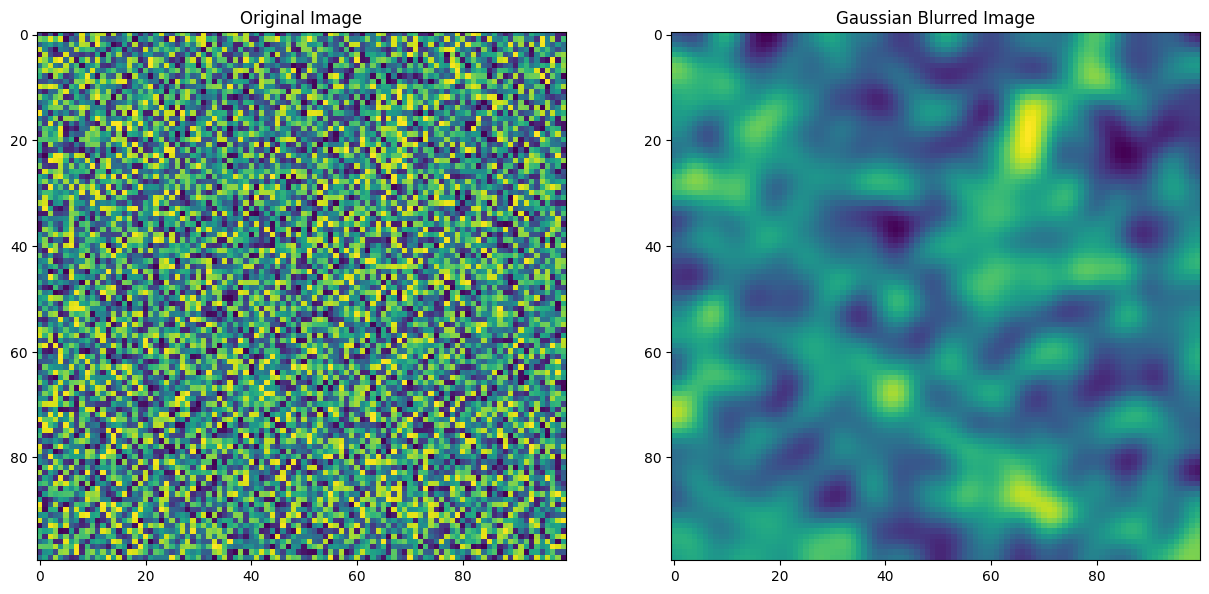

In [30]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt

image = np.random.random((100, 100))

blurred_image = ndimage.gaussian_filter(image, sigma=3)
plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(blurred_image)
plt.title("Gaussian Blurred Image")
plt.show()


In [31]:
from scipy.io import savemat ,loadmat

# Kaydedilecek veri
data = {
    "array": [1, 2, 3, 4, 5],
    "matrix": [[1, 2], [3, 4]],
    "scalar": 42
}

# Veriyi .mat dosyasına kaydet
savemat("example.mat", data)
print("Data saved to 'example.mat'")


# .mat dosyasını oku
loaded_data = loadmat("example.mat")

# MATLAB'ın özel anahtarlarını filtrele (örneğin '__header__')
filtered_data = {k: v for k, v in loaded_data.items() if not k.startswith("__")}

# Veriyi ekrana yazdır
print("Loaded Data:", filtered_data)


Data saved to 'example.mat'
Loaded Data: {'array': array([[1, 2, 3, 4, 5]]), 'matrix': array([[1, 2],
       [3, 4]]), 'scalar': array([[42]])}


In [33]:
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

arr = np.array([
  [0, 1, 2],
  [1, 0, 0],
  [2, 0, 0]
])

newarr = csr_matrix(arr)

print(connected_components(newarr))


(1, array([0, 0, 0], dtype=int32))
